#### [ 이미지 변환 - 회전 및 대칭칭 ]
- 데이터 부족 시 데이터 증가를 위해서 사용함
- 대칭 : 좌우상하 flip()
- 회전 : 지정된 각도로 돌리기 getRotationMatrix2D()

[1] 모듈 로딩 및 데이터 준비 <hr>

In [1]:
## [1-1] 모듈 로딩
import cv2							# 컴퓨터버전 모듈
import numpy as np					# 이미지 데이터 저장 모듈
import matplotlib.pyplot as plt		# 시각화 모듈
import os							# 파일, 폴더, 경로 관련 모듈

In [2]:
## [1-2] 데이터 준비
IMG_DIR = '../data/image/'
FILENAME = 'orange.png'

[2] 이미지 로딩 <hr>

In [3]:
## 로딩 : 경로+파일명
colorIMG=cv2.imread(IMG_DIR+FILENAME, cv2.IMREAD_COLOR)

In [4]:
## 정보확인
if colorIMG is None:
	print(f"{colorIMG}: 이미지 체크")
else:
	print(f'{FILENAME}')
	print(f'형태:{colorIMG.shape}	차원:{colorIMG.ndim}D')

## 이미지 형태 : (행, 열, 채널)

orange.png
형태:(393, 732, 3)	차원:3D


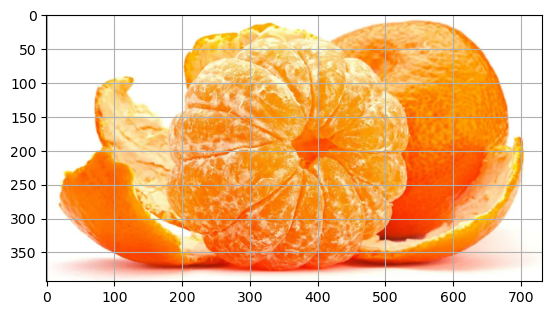

In [5]:
## 이미지 확인
rgbIMG = cv2.cvtColor(colorIMG, cv2.COLOR_BGR2RGB)	# BGR 채널 순서 => RGB 채널 순서

plt.imshow(rgbIMG)
plt.grid()
plt.show()

[3] 이미지 좌우상하 대칭 <hr>

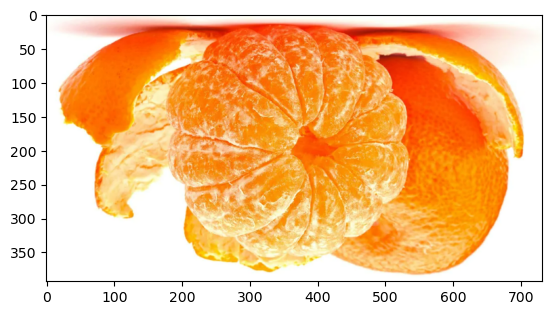

In [6]:
## 상하대칭
top_downIMG = cv2.flip(colorIMG, 0)

plt.imshow(	cv2.cvtColor(top_downIMG, cv2.COLOR_BGR2RGB) )
plt.show()

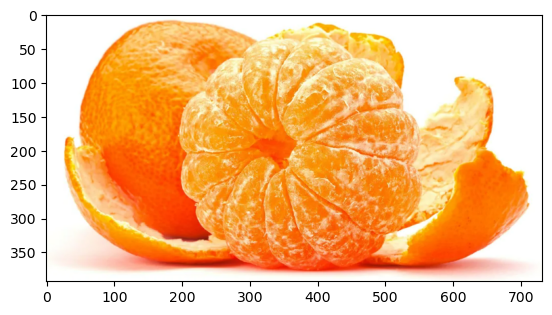

In [7]:
## 좌우대칭
left_rightIMG = cv2.flip(colorIMG, 1)

plt.imshow(	cv2.cvtColor(left_rightIMG, cv2.COLOR_BGR2RGB) )
plt.show()

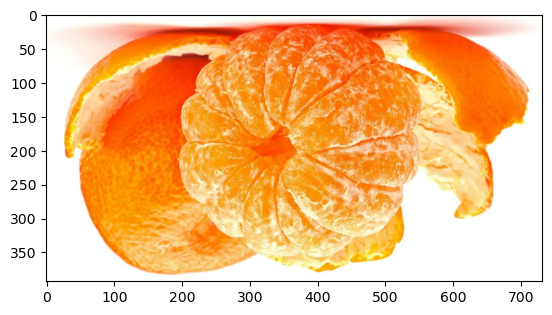

In [8]:
## 상하좌우대칭
udlrIMG = cv2.flip(colorIMG, -1)

plt.imshow(	cv2.cvtColor(udlrIMG, cv2.COLOR_BGR2RGB) )
plt.show()

[4] 이미지 회전 <hr>  
- 회전행렬 추출 단계 : getRotationMatrix2D(중심좌표, 회전각도, 확대/축소비율)
- 변화 단계 : warpAffine(원본이미지, 회전행렬, (행,열))

In [9]:
## [4-1] 회전행렬 추출
H,W,_ = colorIMG.shape

rm45 = cv2.getRotationMatrix2D((W/2, H/2), 45, 1.0)

rm452 = cv2.getRotationMatrix2D((W, H), 45, 0.5)

print(f'rm45 : {rm45.shape}')

rm45 : (2, 3)


rm45IMG : (393, 732, 3)
rm452IMG : (393, 732, 3)


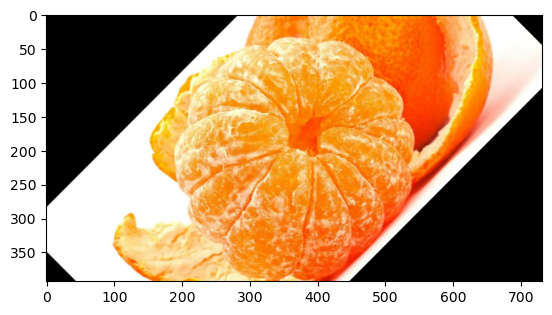

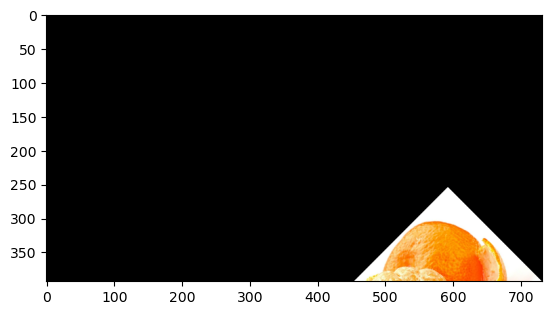

In [10]:
## [4-2] 이미지 변환
rm45IMG=cv2.warpAffine(colorIMG, rm45, (W,H))
print(f'rm45IMG : {rm45IMG.shape}')

rm452IMG=cv2.warpAffine(colorIMG, rm452, (W,H))
print(f'rm452IMG : {rm452IMG.shape}')

plt.imshow(	cv2.cvtColor(rm45IMG, cv2.COLOR_BGR2RGB) )
plt.show()

plt.imshow(	cv2.cvtColor(rm452IMG, cv2.COLOR_BGR2RGB) )
plt.show()